## ECON514 Assignment 1 
### Ryan Quek 81771206


### <b>Question 1</b>

In [88]:
using SymPy
w_1, w_2 = symbols("w_1, w_2",real=true,positive=true)
pi_h, pi_l, y_h, y_l, y_1, y_2, lambda = symbols("pi_h, pi_l, y_h, y_l, y_1, y_2, lambda")
using Plots

#### Type H Workers

In [89]:
lefth = lambda*(pi_h*(w_1/2)+(1-pi_h)w_1)+(1-lambda)*w_1
righth =lambda*(pi_h*w_2+(1-pi_h)w_2/2)+(1-lambda)w_2
probh_simp = solve(lefth-righth,pi_h)[1]
probh = max(min(probh_simp,1),0)

Max(0, Min(1, (lambda*w_2 + 2*w_1 - 2*w_2)/(lambda*(w_1 + w_2))))

Checking special cases ($\lambda=1$, $w_1=w_2$) Both checks should pass:

In [90]:
probh(lambda => 1)


Max(0, Min(1, (2*w_1 - w_2)/(w_1 + w_2)))

In [91]:
probh(w_1 => w_2)

1/2

#### Type L Workers

In [92]:
leftl = lambda*(1-probh)*w_1 + (1-lambda)*(pi_l*w_1/2 +(1-pi_l)*w_1)
rightl = lambda*probh*w_2 +(1-lambda)*(pi_l*w_2+(1-pi_l)*w_2/2)
sol = solve(leftl-rightl,pi_l)[1]
sol(lambda => 0)
probl = max(min(sol,1),0)

Max(0, Min(1, (2*lambda*w_1*Max(0, Min(1, (lambda*w_2 + 2*w_1 - 2*w_2)/(lambda >

> *(w_1 + w_2)))) + 2*lambda*w_2*Max(0, Min(1, (lambda*w_2 + 2*w_1 - 2*w_2)/(l >

> ambda*(w_1 + w_2)))) - lambda*w_2 - 2*w_1 + w_2)/(lambda*w_1 + lambda*w_2 -  >

> w_1 - w_2)))

#### Seller's profits
In this question, the profits depend on who the worker is. Taking Firm 1 as an example, Firm 1 hires a H type worker if a H Type worker applies, and an L type worker if no other H type worker applied. They may also not hire anyone, in that case, the expected profit is 0 (and as such does not figure in this equation).


In [93]:
profit = (y_h - w_1)*lambda*probh + (y_l - w_1)*lambda*probl*(1-lambda)+(lambda*(1-probh))

lambda*(1 - lambda)*(-w_1 + y_l)*Max(0, Min(1, (2*lambda*w_1*Max(0, Min(1, (la >

> mbda*w_2 + 2*w_1 - 2*w_2)/(lambda*(w_1 + w_2)))) + 2*lambda*w_2*Max(0, Min(1 >

> , (lambda*w_2 + 2*w_1 - 2*w_2)/(lambda*(w_1 + w_2)))) - lambda*w_2 - 2*w_1 + >

>  w_2)/(lambda*w_1 + lambda*w_2 - w_1 - w_2))) + lambda*(1 - Max(0, Min(1, (l >

> ambda*w_2 + 2*w_1 - 2*w_2)/(lambda*(w_1 + w_2))))) + lambda*(-w_1 + y_h)*Max >

> (0, Min(1, (lambda*w_2 + 2*w_1 - 2*w_2)/(lambda*(w_1 + w_2))))

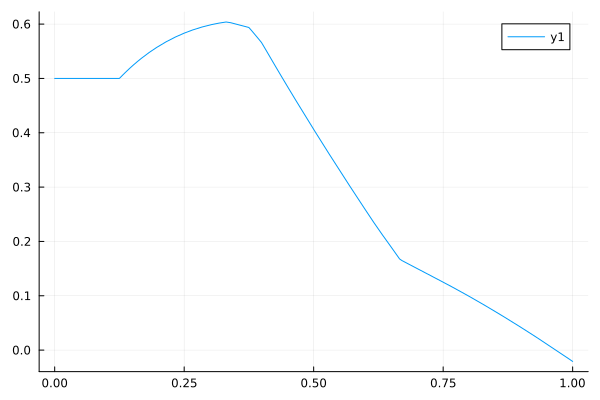

In [98]:
plot(profit(lambda =>5/10,w_2=>1/2,y_h=>1, y_l=>0.75),0,1)

### <b>Question 2</b>

In [4]:
using Pandas
dataset = read_csv("fake_data.csv")

,Subject,G1P1,G1P2,G1P3,G1P4,G2P1,G2P2,G2P3,G2P4
0,1,1,2,1,1,1,2,1,3
1,2,1,2,1,1,1,2,1,3
2,3,2,3,2,1,3,1,1,3
3,4,1,2,1,1,1,1,2,3
4,5,2,3,2,1,2,2,2,2
5,6,1,2,1,1,1,2,1,3
6,7,1,2,1,1,1,2,2,3
7,8,3,3,1,2,2,3,1,1
8,9,1,2,1,1,1,1,2,3
9,10,1,2,1,1,1,2,1,3


In [5]:
length(query(dataset, :(G1P1==1&G1P2==2&G1P3==1&G1P4==1)))

83

In Game 1 every level of player other than level 0 chooses the profile of actions `1,2,1,1`.  Of the 90, 83 chose this profile.  This could randomly include some level 0 players.

Estimate the probability $\rho$ that a randomly selected player from this dataset will have level $0$,  To do this, let $\pi$ be the probability that a randomly selected player will choose the profile `1,2,1,1`. Then $(1-\pi)$ is the probability he or she won't.  
Since 
$\pi = (1-\rho)+\rho (\frac{1}{3})^4$ we could estimate $\pi$ then calculate an estimate of $\rho$ from that.

Given $\pi$, the probablity of seeing a particular collection of profiles, 83 of which are `1,2,1,1` while 7 aren't is
$$\pi^{83}(1-\pi)^{7}$$

In [6]:
using SymPy
pi,rho = symbols("pi, rho", positive=true)
prob = (pi^(83))*(1-pi)^(7)
dprob = diff(prob,pi)
solve(dprob,pi)
#Solve for rho:
solve((83/90)-(1-rho)-rho*(1/3)^4,rho)

1-element Vector{Sym{PyCall.PyObject}}:
 0.0787500000000000

#### Both Games

Assuming only the K-level explanation for behavior there are four profiles that we need to focus on:

Now we calculate profiles:
1. level 1: `1,2,1,1,1,2,1,3`
2. level 2: `1,2,1,1,1,2,2,3`
3. level 3: `1,2,1,1,1,1,2,3`
4. level 4:  `1,2,1,1,3,1,2,3`

Level 4 subject playing as Player 1 in game 2 best replies to the expectation that Player 3 is level 3 who plays 1. The best reply to that is action 3. A level 5 subject as player 1 in Game 2 has the same belief that Player 3 will play 1, so this pattern is repeating.  It is also the same pattern that a fully rational player is supposed to use.  So there is no information in the experiment that would make it possible to tell the difference between levels higher than 3, or whether those players were fully rational (or even Nash).
K level reasoning only explains $\frac{1}{3}$ of the data.

In [7]:
l1 = length(query(dataset, :(G1P1==1&G1P2==2&G1P3==1&G1P4==1&G2P1==1&G2P2==2&G2P3==1&G2P4==3)))
l2 = length(query(dataset, :(G1P1==1&G1P2==2&G1P3==1&G1P4==1&G2P1==1&G2P2==2&G2P3==2&G2P4==3)))
l3 = length(query(dataset, :(G1P1==1&G1P2==2&G1P3==1&G1P4==1&G2P1==1&G2P2==1&G2P3==2&G2P4==3)))
l4 = length(query(dataset, :(G1P1==1&G1P2==2&G1P3==1&G1P4==1&G2P1==3&G2P2==1&G2P3==2&G2P4==3)))
print(string(l1,"  ",l2,"  ",l3," ",l4))
(l1+l2+l3+l4)/90

35  30  18 0

0.9222222222222223

The theory explains around 92.2% of the data in the experiment.

Furthermore,  when a player plays one of the profiles listed above, we still aren't sure of their level because the level 0 player could accidentally choose that profile as well. 
Let $\rho_i$ be probability that a randomly drawn player has level $i$ in ${1,2,3,4}$.

Let $\pi_i$ be the probability that a randomly drawn player chooses the profile of actions that would be chosen by a subject of level $i$ and observe that $\pi_i = \rho_i + \rho_0\frac{1}{3^8}$


In [8]:
rho_1,rho_2,rho_3,rho_4,pi_1,pi_2,pi_3,pi_4 = symbols("rho_1,rho_2,rho_3,rho_4,pi_1,pi_2,pi_3,pi_4", positive=true)

(rho_1, rho_2, rho_3, rho_4, pi_1, pi_2, pi_3, pi_4)

As above, let $\pi_i$ be the probability with which profile $i$ is played. Then if $\rho_i$ happened to be the actual probability with which a subject in the pool has level 1, then we could write the probability with which the level 1 action profile `1,2,1,1,1,2,3,3` is played as
$$
\pi_1 = \rho_1+\rho_0(\frac{1}{3})^8
$$
Similary for
$$
\pi_2 = \rho_2+\rho_0(\frac{1}{3})^8
$$
and
$$
\pi_3 = \rho_3+\rho_0(\frac{1}{3})^8
$$
and
$$
\pi_4 = \rho_4+\rho_0(\frac{1}{3})^8
$$

The probability of seeing the data is 
$$
\pi_1^{35}*\pi_2^{30}*\pi_3^{18}*\pi_4^{0}*(1-\pi_1-\pi_2-\pi_3-\pi_4)^{90-35-30-18}
$$

In [9]:
prob_full = pi_1^l1*pi_2^l2*pi_3^l3*pi_4^l4*(1-pi_1-pi_2-pi_3-pi_4)^(90-83)
#note that pi_4 is 0.

    35     30     18                                 7
pi_1  *pi_2  *pi_3  *(-pi_1 - pi_2 - pi_3 - pi_4 + 1) 

#### Method 2 - Numerical

Write down a traditional likelihood function.  It is just the natural log of the `prob_full` symbolic function converted into a function that contains no symbolic stuff.  

In [10]:
llikelihood(x) = (-1)*(l1*log(x[1])+l2*log(x[2])+l3*log(x[3])+l4*log(x[4])+(90-l1-l2-l3-l4)*log(1-x[1]-x[2]-x[3]-x[4]))


llikelihood (generic function with 1 method)

In [11]:
llikelihood([.3,.3,.1,.2,])

135.822859606037

In [2]:
import Pkg
install_packages = true
for package in ["BlackBoxOptim", "Distributions", "ForwardDiff", "JSON", "Optim", "Quadrature", "StatsPlots",
    "DotEnv","MySQL","DBInterface","Tables","HTTP", "JSON"]
    if install_packages
        Pkg.add(package)
   end
end


   Resolving package versions...
  No Changes to `C:\Users\Ryan Quek\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\Ryan Quek\.julia\environments\v1.11\Manifest.toml`
Precompiling project...
           ✗ Quadrature
  0 dependencies successfully precompiled in 7 seconds. 415 already precompiled.

The following 1 direct dependency failed to precompile:

Quadrature 

Failed to precompile Quadrature [67601950-bd08-11e9-3c89-fd23fb4432d2] to "C:\\Users\\Ryan Quek\\.julia\\compiled\\v1.11\\Quadrature\\jl_5D24.tmp".
ERROR: LoadError: UndefVarError: `AbstractQuadratureAlgorithm` not defined in `DiffEqBase`
Stacktrace:
 [1] getproperty(x::Module, f::Symbol)
   @ Base .\Base.jl:42
 [2] top-level scope
   @ C:\Users\Ryan Quek\.julia\packages\Quadrature\3MSSc\src\Quadrature.jl:11
 [3] include
   @ .\Base.jl:557 [inlined]
 [4] include_package_for_output(pkg::Base.PkgId, input::String, depot_path::Vector{String}, dl_load_path::Vector{String}, load_path::Vector{String}, concrete_de

In [12]:
l = [0.05,0.05,0.05,0.05]
u = [0.95,0.95,0.95,0.95]
x0 = [.3,.3,.1,.2]
result = optimize(llikelihood,l,u,x0,Fminbox())

 * Status: success (objective increased between iterations)

 * Candidate solution
    Final objective value:     1.174781e+02

 * Found with
    Algorithm:     Fminbox with L-BFGS

 * Convergence measures
    |x - x'|               = 8.55e-11 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.63e-10 ≰ 0.0e+00
    |f(x) - f(x')|         = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 0.00e+00 ≤ 0.0e+00
    |g(x)|                 = 1.53e-07 ≰ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    6
    f(x) calls:    316
    ∇f(x) calls:   316


In [13]:
parameters = Optim.minimizer(result)

4-element Vector{Float64}:
 0.3694444444233071
 0.3166666666040356
 0.19000000004509998
 0.05000000000000001

In [14]:
solve([
        rho_1+(1-rho_1-rho_2-rho_3-rho_4)*(1/3)^8-parameters[1],
        rho_2+(1-rho_1-rho_2-rho_3-rho_4)*(1/3)^8-parameters[2],
        rho_3+(1-rho_1-rho_2-rho_3-rho_4)*(1/3)^8-parameters[3],
        rho_4+(1-rho_1-rho_2-rho_3-rho_4)*(1/3)^8-parameters[4],
        ], rho_1,rho_2,rho_3,rho_4
    )

Dict{Sym{PyCall.PyObject}, Sym{PyCall.PyObject}} with 4 entries:
  rho_2 => 0.316655397900524
  rho_1 => 0.369433175719795
  rho_3 => 0.189988731341588
  rho_4 => 0.0499887312964881

In [15]:
Optim.minimum(result)

117.47810053709111

### <b>Question 3</b>
**Based off the eight_room_notebook

In [16]:
using Pkg
using LinearAlgebra,NLsolve, Random, Distributions, Combinatorics

In [17]:
#Function to return vector of opponent strategy profile
function sig_mi(i,K)
    Kret=ones(length(K)-1)
    kind=1
    for j=1:length(K)
        if(j!=i)
            Kret[kind]=K[j]
            kind=kind+1
        end
    end
    return Kret
end
#Function to return vector of opponent strategy profile
function sig_prof(i,k,K)
    Kret=ones(length(K))
    for j=1:length(K)
        if(j!=i)
            Kret[j]=K[j]
        end
        if(j==i)
            Kret[j]=k
        end
    end
    return Kret
end
#Function to return player utility vector
function Utmp(i,K,Room_pay)
    U_vec=ones(length(Room_pay))
    K_mi=sig_mi(i,K)
    for k=1:length(Room_pay)
        Ktmp=vcat(k,K_mi)
        U_vec[k]=Room_pay[k]./sum((Ktmp.==k))
    end
    return U_vec
end

#The algorithm
function Find_PSNE(Num_p,K_old,Room_pay)
    #Initial Pay_off
    U_old=ones(Num_p)
    for i=1:length(K_old)
        U_old[i]=Room_pay[K_old[i]]./sum((K_old.==K_old[i]))
    end
    iters=0
    checks=0
    U_nxt=ones(Num_p)
    K_nxt=ones(Num_p)
    while  norm(U_nxt-U_old)>0
        for i=1:Num_p
            if(checks>0)
                U_old[:]=U_nxt[:]
                K_old[:]=K_nxt[:]
            end
            U_vec=Utmp(i,K_old,Room_pay)
            m_Utmp,m_ktmp=findmax(U_vec)
            K_nxt=sig_prof(i,m_ktmp,K_old)
            U_nxt=sig_prof(i,m_Utmp,U_old)
            checks+=1
        end
        iters+=1
    end
    return U_nxt,K_nxt
end
     


Find_PSNE (generic function with 1 method)

In [18]:
# Find all PSNE by looping through all k_olds
function Find_All_PSNE(Num_p, Room_pay)
    psne_list = []
    all_profiles = collect(multiset_permutations(1:8, Num_p))
    
    for K_old in all_profiles
        U_nxt, K_nxt = Find_PSNE(Num_p, K_old, Room_pay)
        if !(K_nxt in psne_list)
            push!(psne_list, K_nxt)
        end
    end
    return psne_list
end


Num_p = 8
Room_pay = [40, 50, 50, 50, 70, 70, 70, 100];

# Find all PSNE solutions
all_psne = Find_All_PSNE(Num_p, Room_pay)

print("All Pure Strategy Nash Equilibria Profiles:\n")
for eq in all_psne
    println(eq)
end


All Pure Strategy Nash Equilibria Profiles:
[8.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
[8.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 7.0]
[8.0, 2.0, 3.0, 4.0, 5.0, 7.0, 6.0, 8.0]
[8.0, 2.0, 3.0, 4.0, 5.0, 7.0, 8.0, 6.0]
[8.0, 2.0, 3.0, 4.0, 5.0, 8.0, 6.0, 7.0]
[8.0, 2.0, 3.0, 4.0, 5.0, 8.0, 7.0, 6.0]
[8.0, 2.0, 3.0, 4.0, 6.0, 5.0, 7.0, 8.0]
[8.0, 2.0, 3.0, 4.0, 6.0, 5.0, 8.0, 7.0]
[8.0, 2.0, 3.0, 4.0, 6.0, 7.0, 5.0, 8.0]
[8.0, 2.0, 3.0, 4.0, 6.0, 7.0, 8.0, 5.0]
[8.0, 2.0, 3.0, 4.0, 6.0, 8.0, 5.0, 7.0]
[8.0, 2.0, 3.0, 4.0, 6.0, 8.0, 7.0, 5.0]
[8.0, 2.0, 3.0, 4.0, 7.0, 5.0, 6.0, 8.0]
[8.0, 2.0, 3.0, 4.0, 7.0, 5.0, 8.0, 6.0]
[8.0, 2.0, 3.0, 4.0, 7.0, 6.0, 5.0, 8.0]
[8.0, 2.0, 3.0, 4.0, 7.0, 6.0, 8.0, 5.0]
[8.0, 2.0, 3.0, 4.0, 7.0, 8.0, 5.0, 6.0]
[8.0, 2.0, 3.0, 4.0, 7.0, 8.0, 6.0, 5.0]
[8.0, 2.0, 3.0, 4.0, 8.0, 5.0, 6.0, 7.0]
[8.0, 2.0, 3.0, 4.0, 8.0, 5.0, 7.0, 6.0]
[8.0, 2.0, 3.0, 4.0, 8.0, 6.0, 5.0, 7.0]
[8.0, 2.0, 3.0, 4.0, 8.0, 6.0, 7.0, 5.0]
[8.0, 2.0, 3.0, 4.0, 8.0, 7.0, 5.0, 6.0]
[8.0, 2.0, 3.

Excessive output truncated after 524288 bytes.

6.0, 2.0, 5.0, 8.0, 7.0, 8.0, 3.0]
[4.0, 6.0, 2.0, 5.0, 8.0, 8.0, 3.0, 7.0]
[4.0, 6.0, 2.0, 5.0, 8.0, 8.0, 7.0, 3.0]
[4.0, 6.0, 2.0, 5.0, 3.0, 8.0, 7.0, 8.0]
[4.0, 6.0, 2.0, 5.0, 3.0, 8.0, 8.0, 7.0]
[4.0, 6.0, 2.0, 5.0, 3.0, 7.0, 8.0, 8.0]
[4.0, 6.0, 2.0, 5.0, 7.0, 8.0, 3.0, 8.0]
[4.0, 6.0, 2.0, 5.0, 7.0, 8.0, 8.0, 3.0]
[4.0, 6.0, 2.0, 5.0, 7.0, 3.0, 8.0, 8.0]
[4.0, 6.0, 2.0, 7.0, 8.0, 3.0, 5.0, 8.0]
[4.0, 6.0, 2.0, 7.0, 8.0, 3.0, 8.0, 5.0]
[4.0, 6.0, 2.0, 7.0, 8.0, 5.0, 3.0, 8.0]
[4.0, 6.0, 2.0, 7.0, 8.0, 5.0, 8.0, 3.0]
[4.0, 6.0, 2.0, 7.0, 8.0, 8.0, 3.0, 5.0]
[4.0, 6.0, 2.0, 7.0, 8.0, 8.0, 5.0, 3.0]
[4.0, 6.0, 2.0, 7.0, 3.0, 8.0, 5.0, 8.0]
[4.0, 6.0, 2.0, 7.0, 3.0, 8.0, 8.0, 5.0]
[4.0, 6.0, 2.0, 7.0, 3.0, 5.0, 8.0, 8.0]
[4.0, 6.0, 2.0, 7.0, 5.0, 8.0, 3.0, 8.0]
[4.0, 6.0, 2.0, 7.0, 5.0, 8.0, 8.0, 3.0]
[4.0, 6.0, 2.0, 7.0, 5.0, 3.0, 8.0, 8.0]
[4.0, 6.0, 3.0, 8.0, 2.0, 5.0, 7.0, 8.0]
[4.0, 6.0, 3.0, 8.0, 2.0, 5.0, 8.0, 7.0]
[4.0, 6.0, 3.0, 8.0, 2.0, 7.0, 5.0, 8.0]
[4.0, 6.0, 3.0, 8.0, 2

It appears that there is only one actual pure Strategy Nash Equilibrium. What is different is the permutations. The main idea is:
1. 2 players go to Room 8 (to receive 50K won each)
2. 1 player each goes to Room 2-7 (those in Room 2-4 get 50K won, those in Rooms 5-7 get 70K Won each)

The permutations come about because Rooms 2-4 and 5 to 7 have similar payours, and in finding all PSNEs, the room orders are viewed as different solutions.

#### Mixed Strategy Equilibrium

#### Search for Symmetric Mixed Strategy Equilibria

Recall the indifference conditions we use that and the fact $\sigma_1,\sigma_2,\dots,\sigma_8$ is a probability mass function.

Suppose player $1$ choose room $k$, given his opponents choose room $k$ with probability $\sigma_k$ each independently. Then his expected utility is given by:
$$U_{1}(k;\sigma_{-i})=\sum_{x=0}^7\frac{m_k}{x+1}\binom{N-1}{x}\sigma_k^x(1-\sigma_k)^{N-1-X} $$

We solve for equations:
$$U_{i}-U_{1}=0 \hspace{4mm} \forall \hspace{2mm}i=2,3,\dots,8 $$
and 
$$1-\sum_{i=1}^8\sigma_i=0$$

We have 8 equations and 8 unknowns

In [24]:
function ret_res(Num_P,Room_pay,sig_strat)
    Ret_vec=zeros(8)
    Pay_offRm=zeros(8)
    for l=1:8
        for x=0:7
            Pay_offRm[l]+=Room_pay[l]/(x+1)*binomial(Num_p-1,x)*sig_strat[l]^x*(1-sig_strat[l])^(Num_p-1-x)
        end
    end
    for l=2:8
        Ret_vec[l-1]=Pay_offRm[l]-Pay_offRm[1]
    end
    Ret_vec[8]=sum(sig_strat)-1;
    return Ret_vec
end

function solve_fun(sig_strat)
    return ret_res(Num_p,Room_pay,sig_strat)
end
initial_guess= ones(8)./8
soln_model=nlsolve(solve_fun,initial_guess,show_trace=true)
soln_model.zero

8-element Vector{Float64}:
 0.0005900395709166216
 0.0655363728831839
 0.0655363728831839
 0.0655363728831839
 0.1696779680897165
 0.1696779680897165
 0.1696779680897165
 0.2937669375103822

### <b>Question 4</b>

In [1]:
using SymPy

# Define symbolic variables
A, b, c, n, q = symbols("A b c n q", positive=true)


# Demand curve (where Q = n*q since q is constant across all firms)
Q = n * q 
p = A - b * Q 

#Cost and profit function
C = c * q^2  
profit = p * q - C  # Profit function

# Using FOC to digure out the optimal quantity
profit_derivative = diff(profit, q)
eqn = Eq(profit_derivative, 0)

# Solve for q in terms of A, b, c, and n
solution_q = solve(eqn, q)[1]

# Compute the equilibrium price
Q_eq = n * solution_q  
p_eq = A - b * Q_eq  # Equilibrium price
println("Symmetric Nash Equilibrium Quantity per company:")
println(solution_q)


println("Equilibrium Price:")
println(p_eq)

limit_q = limit(Q_eq, n => Inf)
limit_p = limit(p_eq, n=> Inf)

println("Market Qty as n goes to Infinity")
println(limit_q)
println("Market Price as n goes to Infinity")
println(limit_p)

println("Note that because n goes to infinity, it will look like on a per company basis it tends to 0 quantity (or actually a very small quantity)")

Symmetric Nash Equilibrium Quantity per company:
A/(2*(b*n + c))
Equilibrium Price:
-A*b*n/(2*(b*n + c)) + A
Market Qty as n goes to Infinity
A/(2*b)
Market Price as n goes to Infinity
A/2
Note that because n goes to infinity, it will look like on a per company basis it tends to 0 quantity (or actually a very small quantity)
